In [194]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Этап 1. Загрузка датасета и EDA

**Важно:** еще до загрузки датасета из выборки были удалены те респонденты, которые не слышали о препарате. Их ответы по умолчанию считаются не показательными

In [195]:
df = pd.read_csv('/content/drive/MyDrive/Проект_глицин/gli_data.csv')
df.head()

,Отметка времени,Ваш возраст,"Слышали ли вы о препарате ""глицин""?","От кого вы узнали о препарате ""глицин""?",Принимали ли вы когда-либо глицин?,С какой целью вы принимали глицин? (Можно выбрать несколько вариантов),Как долго вы принимали глицин?,Назначал ли вам глицин врач?,Ощущали ли вы эффект от приема глицина?,Считаете ли вы глицин полезным препаратом?,"Оцените эффективность глицина по вашему мнению от 1 до 5 (1 – “бесполезен”, 5 – “очень эффективен”)",Рекомендовали бы вы глицин другим?,Какое у вас отношение к ноотропам?\n\n*Ноотроп - препарат для улучшения деятельности центральной нервной системы
0,14.02.2025 21:03:49,21-23,Да,Семья,Да,Снижение стресса и тревожности,Однократно,Рекомендовали знакомые/интернет,"Да, положительный",Да,4,Да,"Считаю, что некоторые работают, если правильно..."
1,14.02.2025 22:03:07,21-23,Да,Друзья и знакомые,Да,"Снижение стресса и тревожности, Улучшение конц...",Несколько дней (до 1 недели),"Нет, принимал(а) самостоятельно","Нет, эффекта не было",Нет,1,Нет,"Считаю, что некоторые работают, если правильно..."
2,14.02.2025 22:03:09,21-23,Да,Семья,Да,"Снижение стресса и тревожности, Улучшение конц...",Несколько недель (до 1 месяца),Рекомендовали знакомые/интернет,"Да, положительный",Да,4,Да,"Верю, что большинство из них эффективны и полезны"
3,14.02.2025 22:03:31,21-23,Да,Семья,Да,Улучшение концентрации и памяти,Однократно,"Нет, принимал(а) самостоятельно","Нет, эффекта не было",Нет,4,Нет,"Считаю, что некоторые работают, если правильно..."
4,14.02.2025 22:05:34,18-20,Да,Семья,Да,"Снижение стресса и тревожности, Улучшение конц...",Более месяца,"Нет, принимал(а) самостоятельно","Да, положительный",Да,4,Да,"Верю, что большинство из них эффективны и полезны"


In [196]:
df.shape

(229, 13)

In [197]:
columns = {'Ваш возраст': 'age',
          'Слышали ли вы о препарате "глицин"?': 'hear',
          'От кого вы узнали о препарате "глицин"?': 'source',
          'Принимали ли вы когда-либо глицин?': 'used',
          'С какой целью вы принимали глицин? (Можно выбрать несколько вариантов)': 'goals',
          'Как долго вы принимали глицин?': 'how_long',
          'Назначал ли вам глицин врач?': 'doctor',
          'Ощущали ли вы эффект от приема глицина?': 'effect',
          'Считаете ли вы глицин полезным препаратом?': 'useful',
          'Оцените эффективность глицина по вашему мнению от 1 до 5 (1 – “бесполезен”, 5 – “очень эффективен”)': 'effective_mark',
          'Рекомендовали бы вы глицин другим?': 'your_recommend',
          'Какое у вас отношение к ноотропам?\n\n*Ноотроп - препарат для улучшения деятельности центральной нервной системы': 'nootrops',}

In [198]:
df = df.rename(columns = columns)
df = df.drop('Отметка времени', axis=1)

In [199]:
df.isna().sum()

,0
age,0
hear,0
source,0
used,0
goals,50
how_long,50
doctor,50
effect,50
useful,0
effective_mark,0


In [200]:
df['used'] = df['used'].map({'Да': 'yes', 'Нет': 'no'})
df['useful'] = df['useful'].map({'Да': 'yes', 'Нет': 'no'})
df['your_recommend'] = df['your_recommend'].map({'Да': 'yes', 'Нет': 'no'})
df['hear'] = df['hear'].map({'Да': 'yes', 'Нет': 'no'})

df['goals'] = df['goals'].str.split(',')
df.head()

,age,hear,source,used,goals,how_long,doctor,effect,useful,effective_mark,your_recommend,nootrops
0,21-23,yes,Семья,yes,[Снижение стресса и тревожности],Однократно,Рекомендовали знакомые/интернет,"Да, положительный",yes,4,yes,"Считаю, что некоторые работают, если правильно..."
1,21-23,yes,Друзья и знакомые,yes,"[Снижение стресса и тревожности, Улучшение ко...",Несколько дней (до 1 недели),"Нет, принимал(а) самостоятельно","Нет, эффекта не было",no,1,no,"Считаю, что некоторые работают, если правильно..."
2,21-23,yes,Семья,yes,"[Снижение стресса и тревожности, Улучшение ко...",Несколько недель (до 1 месяца),Рекомендовали знакомые/интернет,"Да, положительный",yes,4,yes,"Верю, что большинство из них эффективны и полезны"
3,21-23,yes,Семья,yes,[Улучшение концентрации и памяти],Однократно,"Нет, принимал(а) самостоятельно","Нет, эффекта не было",no,4,no,"Считаю, что некоторые работают, если правильно..."
4,18-20,yes,Семья,yes,"[Снижение стресса и тревожности, Улучшение ко...",Более месяца,"Нет, принимал(а) самостоятельно","Да, положительный",yes,4,yes,"Верю, что большинство из них эффективны и полезны"


In [201]:
df.dtypes

,0
age,object
hear,object
source,object
used,object
goals,object
how_long,object
doctor,object
effect,object
useful,object
effective_mark,int64


# Этап 2. Возрастные группы

In [202]:
df_age = df.groupby('age').agg(count=('hear', 'count')).reset_index()

total = df_age['count'].sum()
df_age['percentage'] = (df_age['count'] / total * 100).round(2)

df_age

,age,count,percentage
0,18-20,91,39.74
1,21-23,83,36.24
2,24 и старше,55,24.02


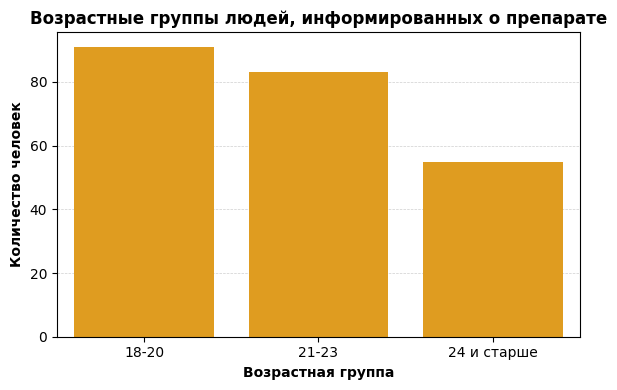

In [219]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_age, x = 'age', y = 'count', color='orange')

plt.grid(True, axis='y', alpha=0.6, linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)


plt.xlabel('Возрастная группа', fontweight='bold')
plt.ylabel('Количество человек',fontweight='bold')
plt.title('Возрастные группы людей, информированных о препарате', fontweight='bold')
plt.tight_layout()
plt.show()

**Промежуточный вывод:** среди опрошенных преобладают возрастные группы 18-20 и 21-23. Более старших людей меньше

# Этап 3. Источники информации о препарате

In [204]:
df.groupby('source').agg({'hear': 'count'})

,hear
source,
Врач,19
Другое,10
Друзья и знакомые,56
Интернет,23
Реклама,12
Семья,109


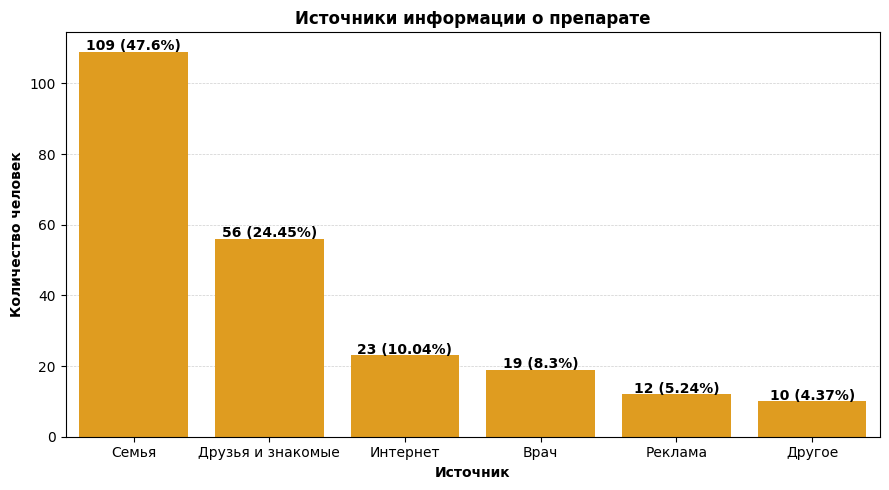


Всего опрошенных, слышавших о препарате: 229 чел.
Самый популярный источник: Семья (109 чел., 47.6%)


In [220]:
source = df.groupby('source').size().reset_index(name='count').sort_values('count', ascending=False)

plt.figure(figsize=(9, 5))
ax = sns.barplot(data=source, x='source', y='count', color='orange')

plt.grid(True, axis='y', alpha=0.6, linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

total = source['count'].sum()
source['percentage'] = (source['count']/total * 100).round(2)

for i, (_, row) in enumerate(source.iterrows()):
    ax.text(i, row['count'] + 0.5,
            f"{int(row['count'])} ({row['percentage']}%)",
            ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Источник', fontweight='bold')
plt.ylabel('Количество человек', fontweight='bold')
plt.title('Источники информации о препарате', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nВсего опрошенных, слышавших о препарате: {total} чел.")
print(f"Самый популярный источник: {source.iloc[0]['source']} ({source.iloc[0]['count']} чел., {source.iloc[0]['percentage']}%)")

**Промежуточный вывод:** Видим, что большинство узнали о препарате от членов семьи, на втором месте - друзья и знакомые. Также часть людей узнали о препарате от врача, из интернета и рекламы

# Этап 4. Изучаем цели приема

Среди опрошенных узнаем количество тех, кто принимал препарат

In [206]:
df.groupby('used').agg({'hear': 'count'})

,hear
used,
no,50
yes,179


Видим, что большинство принимали данный препарат. Посмотрим, цели их приема.
Отметим, что в ходе опроса респонденты могли выбирать не одну цель приема, а несколько, что применимо к исследованию.

В рекламе препарата часто упоминается, что глицин следует принимать  для улучшения памяти, концентрации, а также при стрессах. Посмотрим, какие цели отмечали респонденты

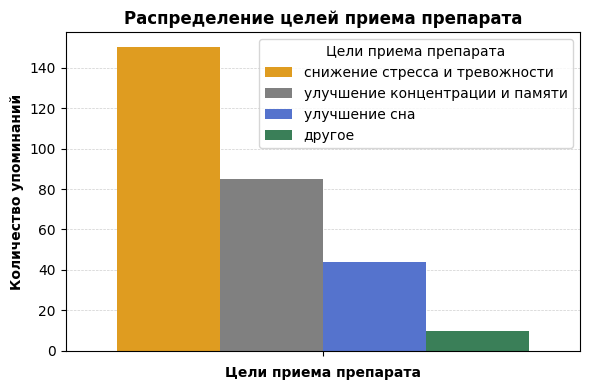

In [221]:
goals = (df.query('used == "yes"').explode('goals').assign(goals=lambda x: x['goals'].str.strip().str.lower())
         .groupby('goals').size().reset_index(name='count')
         .sort_values('count', ascending=False))

palette = {'снижение стресса и тревожности':'#FFA500',
           'улучшение концентрации и памяти':'#808080',
           'улучшение сна':'#4169E1',
           'другое':'#2E8B57'}

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=goals, hue='goals', y='count', palette=palette)

plt.grid(True, axis='y', alpha=0.6, linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

ax.legend_.set_title('Цели приема препарата')

plt.xlabel('Цели приема препарата', fontweight='bold')
plt.ylabel('Количество упоминаний', fontweight='bold')
plt.title('Распределение целей приема препарата', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Промежуточный вывод:** видим, что большинство отмечали "снижение стресса и тревожности". Также многие отмечали "улучшение концентрации и памяти", что соотносится с тем, что упоминается в рекламе препарата, а также в инструкции к нему.

Обратимся к [инструкции](https://glicin.ru/instruction/?ysclid=mlrs0096or662919574)

Способ действия препарата Глицин
Глицин – это аминокислота и один из основных тормозных нейромедиаторов головного мозга. Глицин нормализует и активирует процессы защитного торможения в центральной нервной системе, уменьшает психоэмоциональное напряжение, повышает умственную работоспособность.

Препарат обладает следующими свойствами:
— уменьшает психоэмоциональное напряжение, агрессивность, конфликтность, повышает социальную адаптацию;
— улучшает настроение;
— облегчает засыпание и нормализует сон;
— повышает умственную работоспособность;
— уменьшает вегето-сосудистые расстройства (в т.ч. во время климакса);
— уменьшает степень выраженности мозговых расстройств при ишемическом инсульте и черепно-мозговой травме;
— уменьшает токсическое действие алкоголя и других лекарственных средств, угнетающих функцию ЦНС.

**Однако уже тут возникают вопросы, поскольку глицин практически не проникает через ГЭБ, то как он может обладать частью указанных свойств?**

# Этап 5. Найдем людей. кому препарат назначал врач, а кому нет

In [208]:
df.groupby('doctor').agg({'hear': 'count'})

,hear
doctor,
Да,35
"Нет, принимал(а) самостоятельно",101
Рекомендовали знакомые/интернет,43


Как мы видим, примерно 19.55% опрошенным препарат назначал врач. Однако не уточнялись обстоятельства назначения, поскольку этот аспект не исследовался. Важно, что глицин может быть полезен при гипоксии и некоторых других показаниях, но это не входит в поле данного исследования

In [209]:
df_nona = df.dropna(subset=['effect'])

print(f"Исходный размер: {len(df)}")
print(f"После удаления пропусков: {len(df_nona)}")
print(f"Удалено строк: {len(df) - len(df_nona)}")

Исходный размер: 229
После удаления пропусков: 179
Удалено строк: 50


/tmp/ipython-input-554248387.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


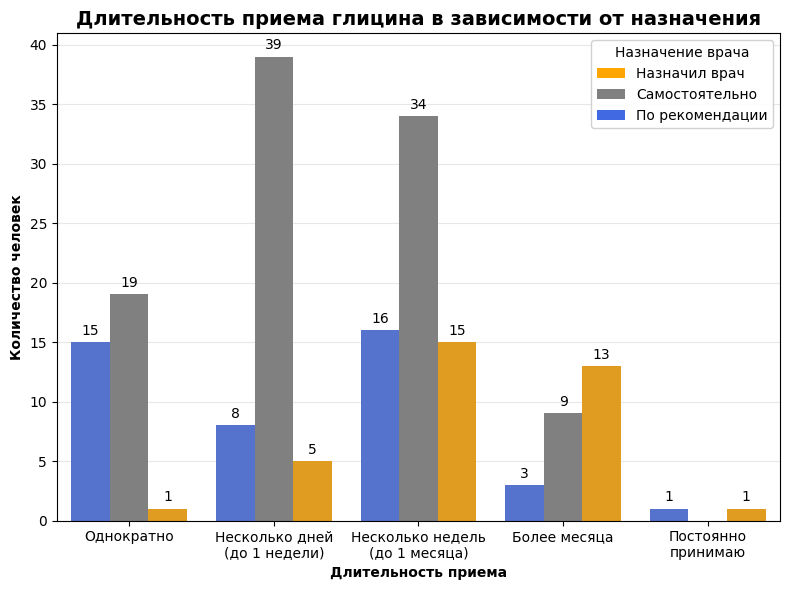

In [222]:
plt.figure(figsize=(8, 6))

colors = {
    'Да': '#FFA500',
    'Нет, принимал(а) самостоятельно': '#808080',
    'Рекомендовали знакомые/интернет': '#4169E1'}

ax = sns.countplot(data=df_nona, x='how_long', hue='doctor', palette=colors)

plt.title('Длительность приема глицина в зависимости от назначения',
          fontsize=14, fontweight='bold')
plt.xlabel('Длительность приема', fontweight='bold')
plt.ylabel('Количество человек', fontweight='bold')

plt.grid(True, axis='y', alpha=0.3)
plt.gca().set_axisbelow(True)

for container in ax.containers:
    ax.bar_label(container, padding=3)

# Создаем легенду с правильными цветами
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFA500', label='Назначил врач'),
    Patch(facecolor='#808080', label='Самостоятельно'),
    Patch(facecolor='#4169E1', label='По рекомендации')
]
plt.legend(handles=legend_elements, title='Назначение врача', loc='upper right', frameon=True, framealpha=0.9)

label_mapping = {
    'Несколько дней (до 1 недели)': 'Несколько дней\n(до 1 недели)',
    'Несколько недель (до 1 месяца)': 'Несколько недель\n(до 1 месяца)',
    'Постоянно принимаю': 'Постоянно\nпринимаю'
}

current_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = [label_mapping.get(label, label) for label in current_labels]
ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

**Вывод:** большинство людей, кому препарат назначал врач, принимали его длительно (от нескольких недель до одного месяца и более).
Те, кто принимал препарат самостоятельно принимали его чаще краткосрочно.
Те, кому препарат рекомендовали знакомые/друзья принимали в основном препарат либо однократно, либо менее месяца

# Этап 6. Проверим, есть ли связь между верой в эффективность препарата и субъективно ощущаемой эффективностью

In [216]:
df_nona.groupby('useful').agg({'hear': 'count'})

,hear
useful,
no,89
yes,90


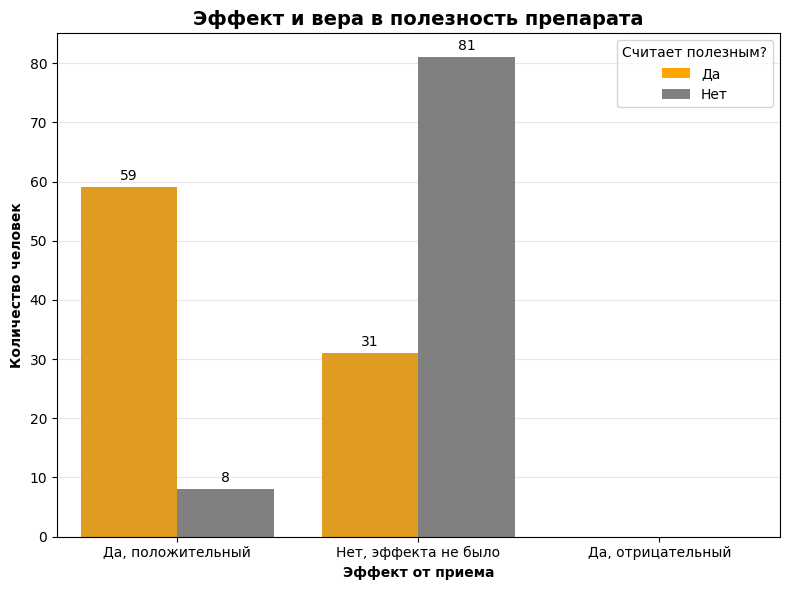

In [223]:
from matplotlib.patches import Patch

plt.figure(figsize=(8, 6))

useful_colors = {'yes': '#FFA500', 'no': '#808080'}

ax = sns.countplot(data=df_nona, x='effect', hue='useful',
                   order=['Да, положительный', 'Нет, эффекта не было', 'Да, отрицательный'],
                   palette=useful_colors)

plt.title('Эффект и вера в полезность препарата',
          fontsize=14, fontweight='bold')
plt.xlabel('Эффект от приема', fontweight='bold')
plt.ylabel('Количество человек', fontweight='bold')
plt.grid(True, axis='y', alpha=0.3)
plt.gca().set_axisbelow(True)

for container in ax.containers:
    ax.bar_label(container, padding=3)

legend_elements = [Patch(facecolor='#FFA500', label='Да'),
                   Patch(facecolor='#808080', label='Нет')]
ax.legend(handles=legend_elements, title='Считает полезным?')

plt.tight_layout()
plt.show()

In [212]:
#вера_эффект
yes_yes = ((len(df_nona.query('useful == "yes" & effect == "Да, положительный"'))/len(df_nona))) *100
yes_no = (len(df_nona.query('useful == "yes" & effect == "Нет, эффекта не было"'))/len(df_nona)) *100
no_yes = (len(df_nona.query('useful == "no" & effect == "Да, положительный"'))/len(df_nona)) *100
no_no = (len(df_nona.query('useful == "no" & effect == "Нет, эффекта не было"'))/len(df_nona)) *100

print(f'Верит в эффект и отмечает положительный {round(yes_yes,2)}%')
print(f'Верит в эффект, но не ощутил его {round(yes_no,2)}%')
print(f'Не верит в эффект но заметил положительный {round(no_yes,2)}%')
print(f'Не верит в эффект и не ощутил его {round(no_no,2)}%')

Верит в эффект и отмечает положительный 32.96%
Верит в эффект, но не ощутил его 17.32%
Не верит в эффект но заметил положительный 4.47%
Не верит в эффект и не ощутил его 45.25%


In [218]:
#доли
yes = ((len(df_nona.query('useful == "yes" & effect == "Да, положительный"'))/len(df_nona.query('useful == "yes"')))) *100
no = ((len(df_nona.query('useful == "no" & effect == "Да, положительный"'))/len(df_nona.query('useful == "no"')))) *100


print(f'Отмечает положительный среди всех, кто верит в эффект {round(yes)}%')
print(f'Отмечает положительный среди всех, кто НЕ верит в эффект  {round(no)}%')

Отмечает положительный среди всех, кто верит в эффект 66%
Отмечает положительный среди всех, кто НЕ верит в эффект  9%


**Вывод:** Использованы данные о тех, кто отвечал на вопрос про ощущаемый эффект. Не было выявлено тех, кто ощутил отрицательный эффект препарата.

Однако визуально видим, что среди тех, кто верит в эффективность препарата, чаще был отмечен положительный эффект

В процентах: \
**32,96%** Верит в эффект и отмечает положительный \
**17.32%** Верит в эффект, но не ощутил его \
**4.47%** Не верит в эффект но заметил положительный \
**45.25%** Не верит в эффект и не ощутил его

In [213]:
effective_mark = df['effective_mark'].value_counts()

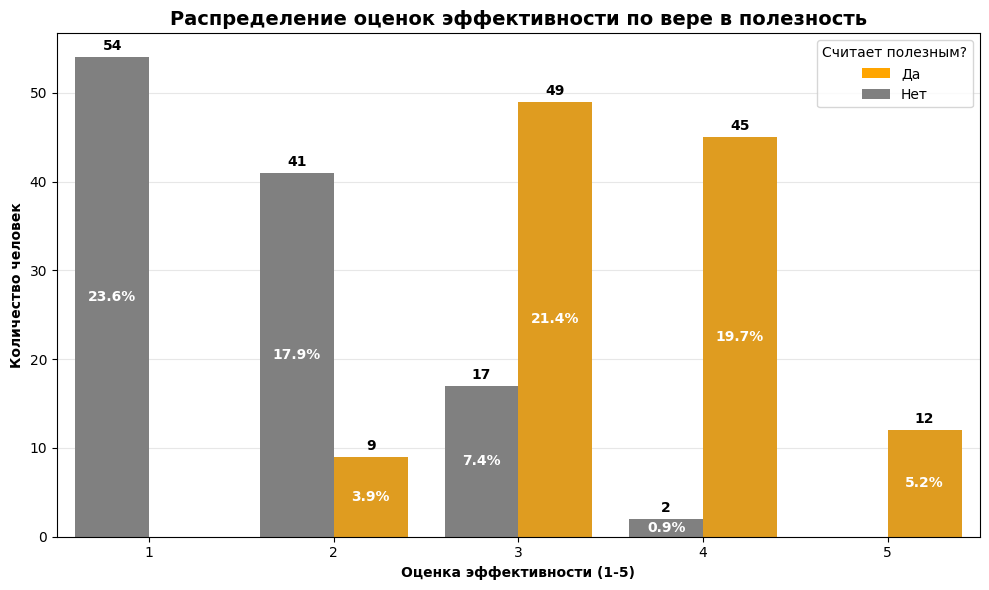

In [224]:
rating_by_useful = df.groupby(['effective_mark', 'useful']).size().reset_index(name='count')
rating_by_useful = rating_by_useful.sort_values('effective_mark')

total = len(df)
rating_by_useful['percentage'] = (rating_by_useful['count'] / total * 100).round(1)

plt.figure(figsize=(10, 6))

useful_colors = {'yes': '#FFA500', 'no': '#808080'}
ax = sns.barplot(data=rating_by_useful,
                 x='effective_mark',
                 y='count',
                 hue='useful',
                 palette=useful_colors)

plt.title('Распределение оценок эффективности по вере в полезность',
          fontsize=14, fontweight='bold')
plt.xlabel('Оценка эффективности (1-5)', fontweight='bold')
plt.ylabel('Количество человек', fontweight='bold')

plt.grid(True, axis='y', alpha=0.3)
plt.gca().set_axisbelow(True)

for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height > 0:
            x_pos = rect.get_x() + rect.get_width()/2
            ax.text(x_pos, height/2, f'{height/total*100:.1f}%',
                   ha='center', va='center', color='white', fontweight='bold', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FFA500', label='Да'),
                   Patch(facecolor='#808080', label='Нет')]
ax.legend(handles=legend_elements, title='Считает полезным?')

plt.tight_layout()
plt.show()

**Вывод:**
Респонденты, которые верят в эффективность препарата, оценивали в большинстве своем его эффективность на 3 и более балла. Только **3.9%** поставили оценку 2.

Интереснее картина с респондентами, которые отмечали, что в эффективность препарата не верят. Большинство поставили оценки 1 и 2, однако нашлись и те, кто поставил 3 и 4 (7.4% и 0.9% соответственно). Такие ответы могут быть как результатом ошибки (респондент не то отметил), так и простой неуверенностью в эффекте

### Итоговый вывод

Проведенное исследование позволило количественно оценить факторы, формирующие восприятие препарата «Глицин».

1.  **Социальные факторы:** Ключевую роль в формировании доверия играет «сарафанное радио». Основными каналами информации о препарате являются семья (48%) и друзья/знакомые (24%), что значительно превосходит влияние врачей (8%) и рекламы (5%).

2.  **Эффект плацебо:** Анализ подтвердил значительное влияние эффекта плацебо на воспринимаемую эффективность.
    *   Вера в полезность препарата (50,2%) существенно превышает долю респондентов, реально ощутивших положительный эффект (37,9%).
    *   При этом среди **верящих** в эффективность положительный эффект отмечают **65,6%**, в то время как среди **неверящих** — только **9%**.

**Обобщающий вывод:** Популярность и воспринимаемая эффективность Глицина в исследуемой выборке обусловлена не столько его доказанным фармакологическим действием, сколько совокупностью социальных факторов (доверие к окружению) и эффектом плацебо.